### Boom Bikes Assignment 

## STEP 1 - Reading & Understanding Data

In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
# loading data
df=pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# shape 
df.shape


(730, 16)

### OBSERVATION
    1. The data set consists of 730 rows and 16 columns. 

In [5]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
# info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### OBSERVATIONS 
    1. There are no null values in the data set. 

In [8]:
# columns in dataset 
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
# checking duplicates 
len(df[df.duplicated()])

0

### OBSERVATIONS
    1.No duplicate values are there in data set.

## DROPPING COLUMNS 

In [11]:
df=df.drop(["instant","dteday","casual","registered"],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [13]:
cat_cols=["season","mnth","weekday","weathersit"]
cont_cols=["temp","hum","windspeed","atemp"]
target_col=["cnt"]
binary_col= ["workingday","yr","holiday"]
len(cat_cols)+len(cont_cols)+len(target_col)+len(binary_col)

12

###  STEP -  2  Mapping Categorical Variables

In [14]:
#MAPPING CATEGORICAL VARIABLES WITH THEIR SUBCATEGORIES. 
df["weekday"]=df.weekday.map({0:"d0_sun", 1: "d1_mon", 2:"d2_tues",3:"d3_wed",4:"d4_thur",5:"d5_fri",6:"d6_sat"})
df["mnth"]=df.mnth.map({1:"month1",2:"month2",3:"month3",4:"month4",5:"month5",6:"month6",7:"month7",8:"month8",9:"month9",
                       10:"month10",11:'month11',12:"month12"})
df['season']=df.season.map({1:'s1_spring',2:'s2_summer',3:"s3_fall",4:"s4_winter"})
df["weathersit"]=df.weathersit.map({1:"w1_clear",2:"w2_mistcloudy",3:"w3_lightsnow",4:"w4_heavyrain"})

## MAPPING

#### Weekday
    d0_sun=sunday, d1_mon=Monday ,  d2_tues=Tuesday , d3_wed=Wednesday ,  d4_thur =Thursday , d5_fri =Friday ,d6_sat =Saturday
#### mnth
     month1=January, month2 = February, month3 = March, month4 = April, month 5 5= May, month6 = June, month7= July, 
     month8 = August , month9 = September, month10 = October, month11 = November and month12= December.
#### season 
    s1_spring = spring ,s2_summer =summer ,s3_fall= fall , s4_winter = winter
#### weathersit 
    w1_clear = clear+fewclouds , w2_mistcloudy = Mist+cloudy , w3_lightsnow = Lightsnow , w4_heavyrain = HeavyRain

### STEP 3  -  DATA VISUALISATION 

<Axes: title={'center': 'DISTRIBUTION PLOT FOR TARGET VARIABLE CNT'}, xlabel='cnt', ylabel='Density'>

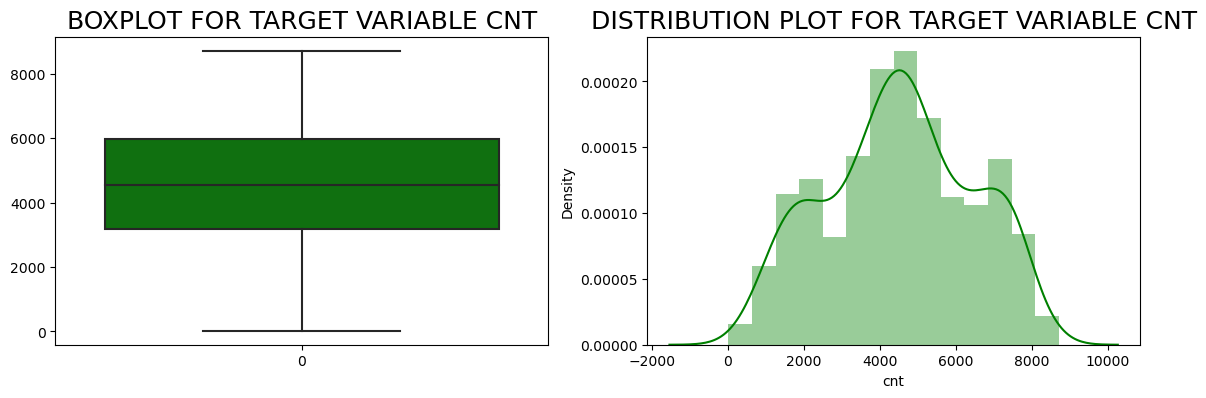

In [15]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title("Boxplot for target variable cnt".upper(),fontsize=18)
sns.boxplot(df.cnt,color="g")
            
plt.subplot(1,2,2)
plt.title("distribution plot for target variable cnt".upper(),fontsize=18)
sns.distplot(df.cnt,color="g")


### OBSERVATIONS -- 
    1. We can clearly observe that the target variable is almost normally distributed.
    2. Median is around 5000 with upper IQR around 6000 and lower IQR around 3000. 

## Univariate analysis for categorical variables

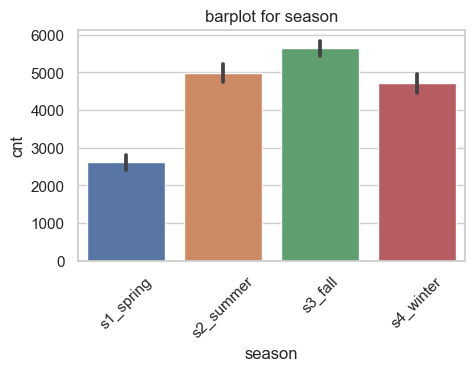

In [16]:
plt.figure(figsize=[5,3])
sns.set_theme(style="whitegrid")
sns.barplot(data=df , x="season",y="cnt")
plt.xticks(rotation=45)
plt.title("barplot for season")
plt.show()

### Observations 
    We observe that season 3 that is fall season is the season where number of rental bikes are more followed by season 2 ie 
    summer. 

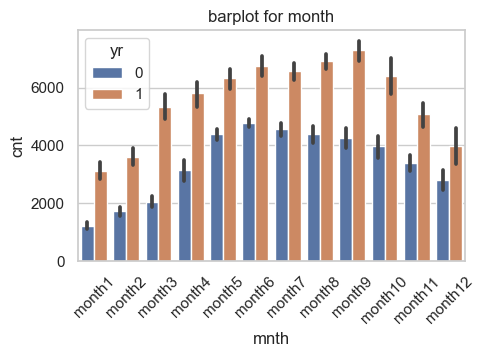

In [17]:
plt.figure(figsize=[5,3])
sns.set_theme(style="whitegrid")
sns.barplot(data=df , x="mnth", y="cnt",hue="yr")
plt.xticks(rotation=45)
plt.title("barplot for month")
plt.show()

### Observation 
    More number of bikes are rented in year 2019 and maximum number of bikes are rented in 
    month of august and september. 

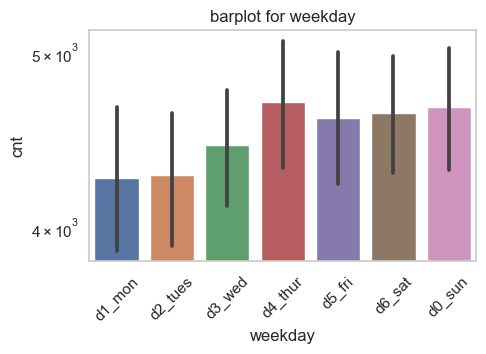

In [18]:
plt.figure(figsize=[5,3])
sns.set_theme(style="whitegrid")
sns.barplot(data=df , x="weekday",y="cnt")
plt.yscale('log')
plt.xticks(rotation=45)
plt.title("barplot for weekday")
plt.show()

### Observations 
    More bikes were rented on thursday(day4) and sunday(day0) and saturday.

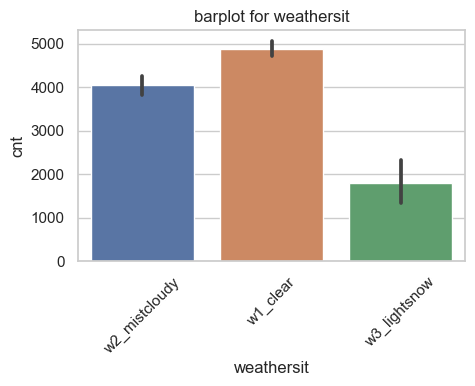

In [19]:
plt.figure(figsize=[5,3])
sns.set_theme(style="whitegrid")
sns.barplot(data=df , x="weathersit",y="cnt")
plt.xticks(rotation=45)
plt.title("barplot for weathersit")
plt.show()

### Observations 
    More bikes were rented in weather_sit1 ie clear and few cloudy weather. 

## Univariate analysis for continuous columns

DISTRIBUTION PLOT FOR  temp


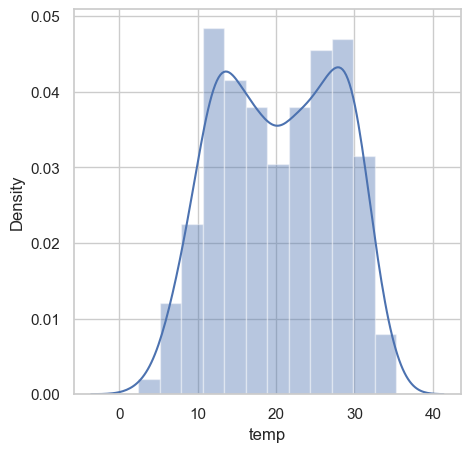

DISTRIBUTION PLOT FOR  hum


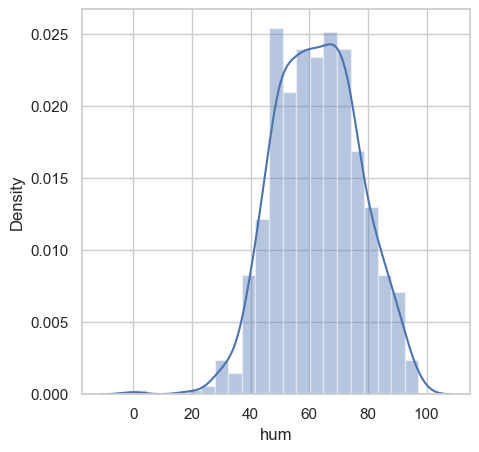

DISTRIBUTION PLOT FOR  windspeed


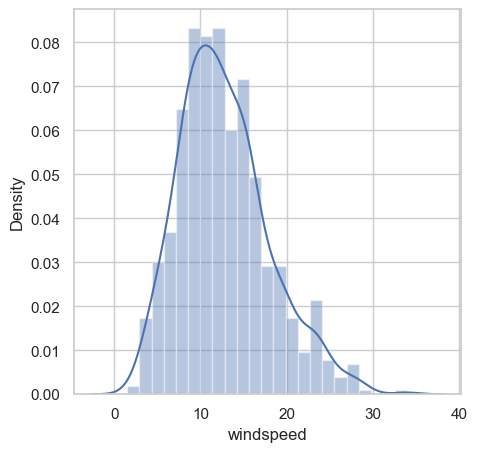

DISTRIBUTION PLOT FOR  atemp


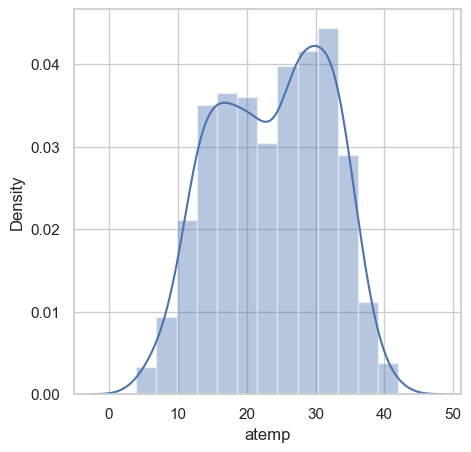

In [20]:
cont_cols=["temp","hum","windspeed","atemp"]
for i in cont_cols:
    plt.figure(figsize=[5,5])
    print("DISTRIBUTION PLOT FOR ",i)
    sns.distplot(df[i])
    plt.show()

### Observation 
    1. Temperature range lies between 10-30 degree celcius.
    2. Humidity ranges from 50-70.
    3. Density of windspeed lies between 10-20.
    

### Bivariate analysis for continous variables

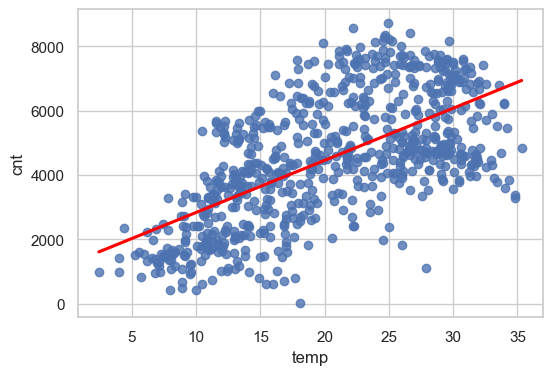

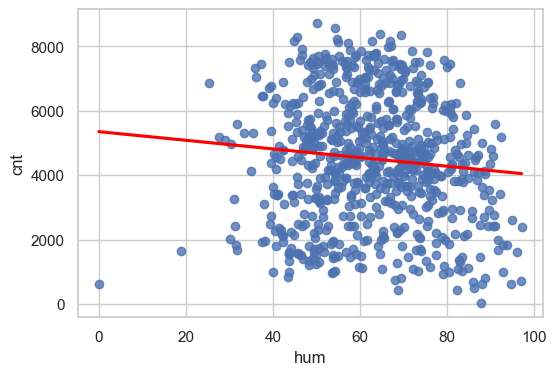

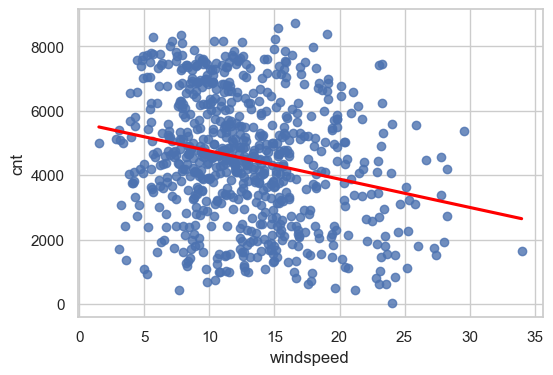

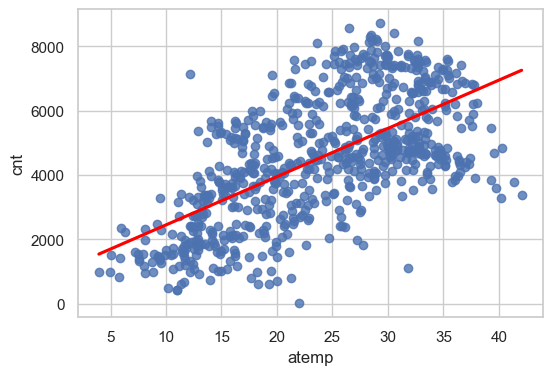

In [21]:
cont_cols=["temp","hum","windspeed","atemp"]
y="cnt"
for i in cont_cols:
    plt.figure(figsize=[6,4])
    sns.regplot(data=df,x=df[i],y=y,ci=None,line_kws={"color":"red"})

### Observations 
    1.More bikes were rented at 15-32 degree temperature.
    2.More bikes were rented at higher humidity.
    3.Rental rate increases when windspeeed is low. 

### VISUALISING NUMERICAL VARIABLE 

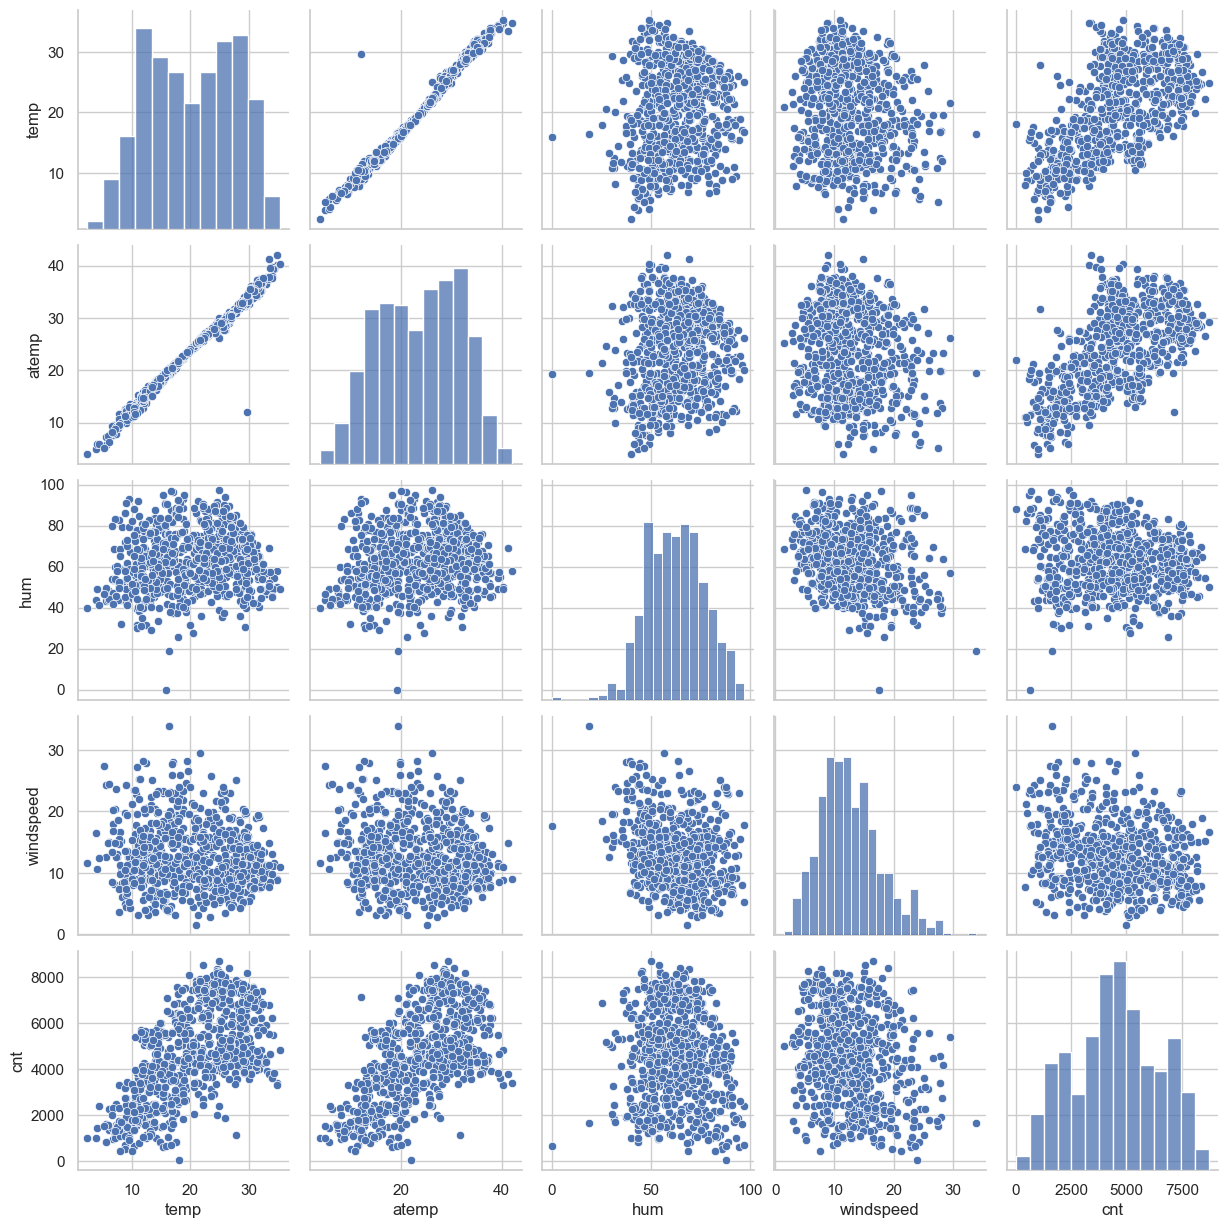

In [22]:
sns.pairplot(df,vars=["temp","atemp","hum","windspeed","cnt"])
plt.show()

### OBSERVATIONS 
    1. We can observe a positive correlation between temp and cnt and atemp and cnt.Due to       
        multicollinearity we should remove one of them but we will not remove this 
        because RFE will take care of that. 

### VISUALISING CATEGORICAL VARIABLE ----  BOX PLOT 

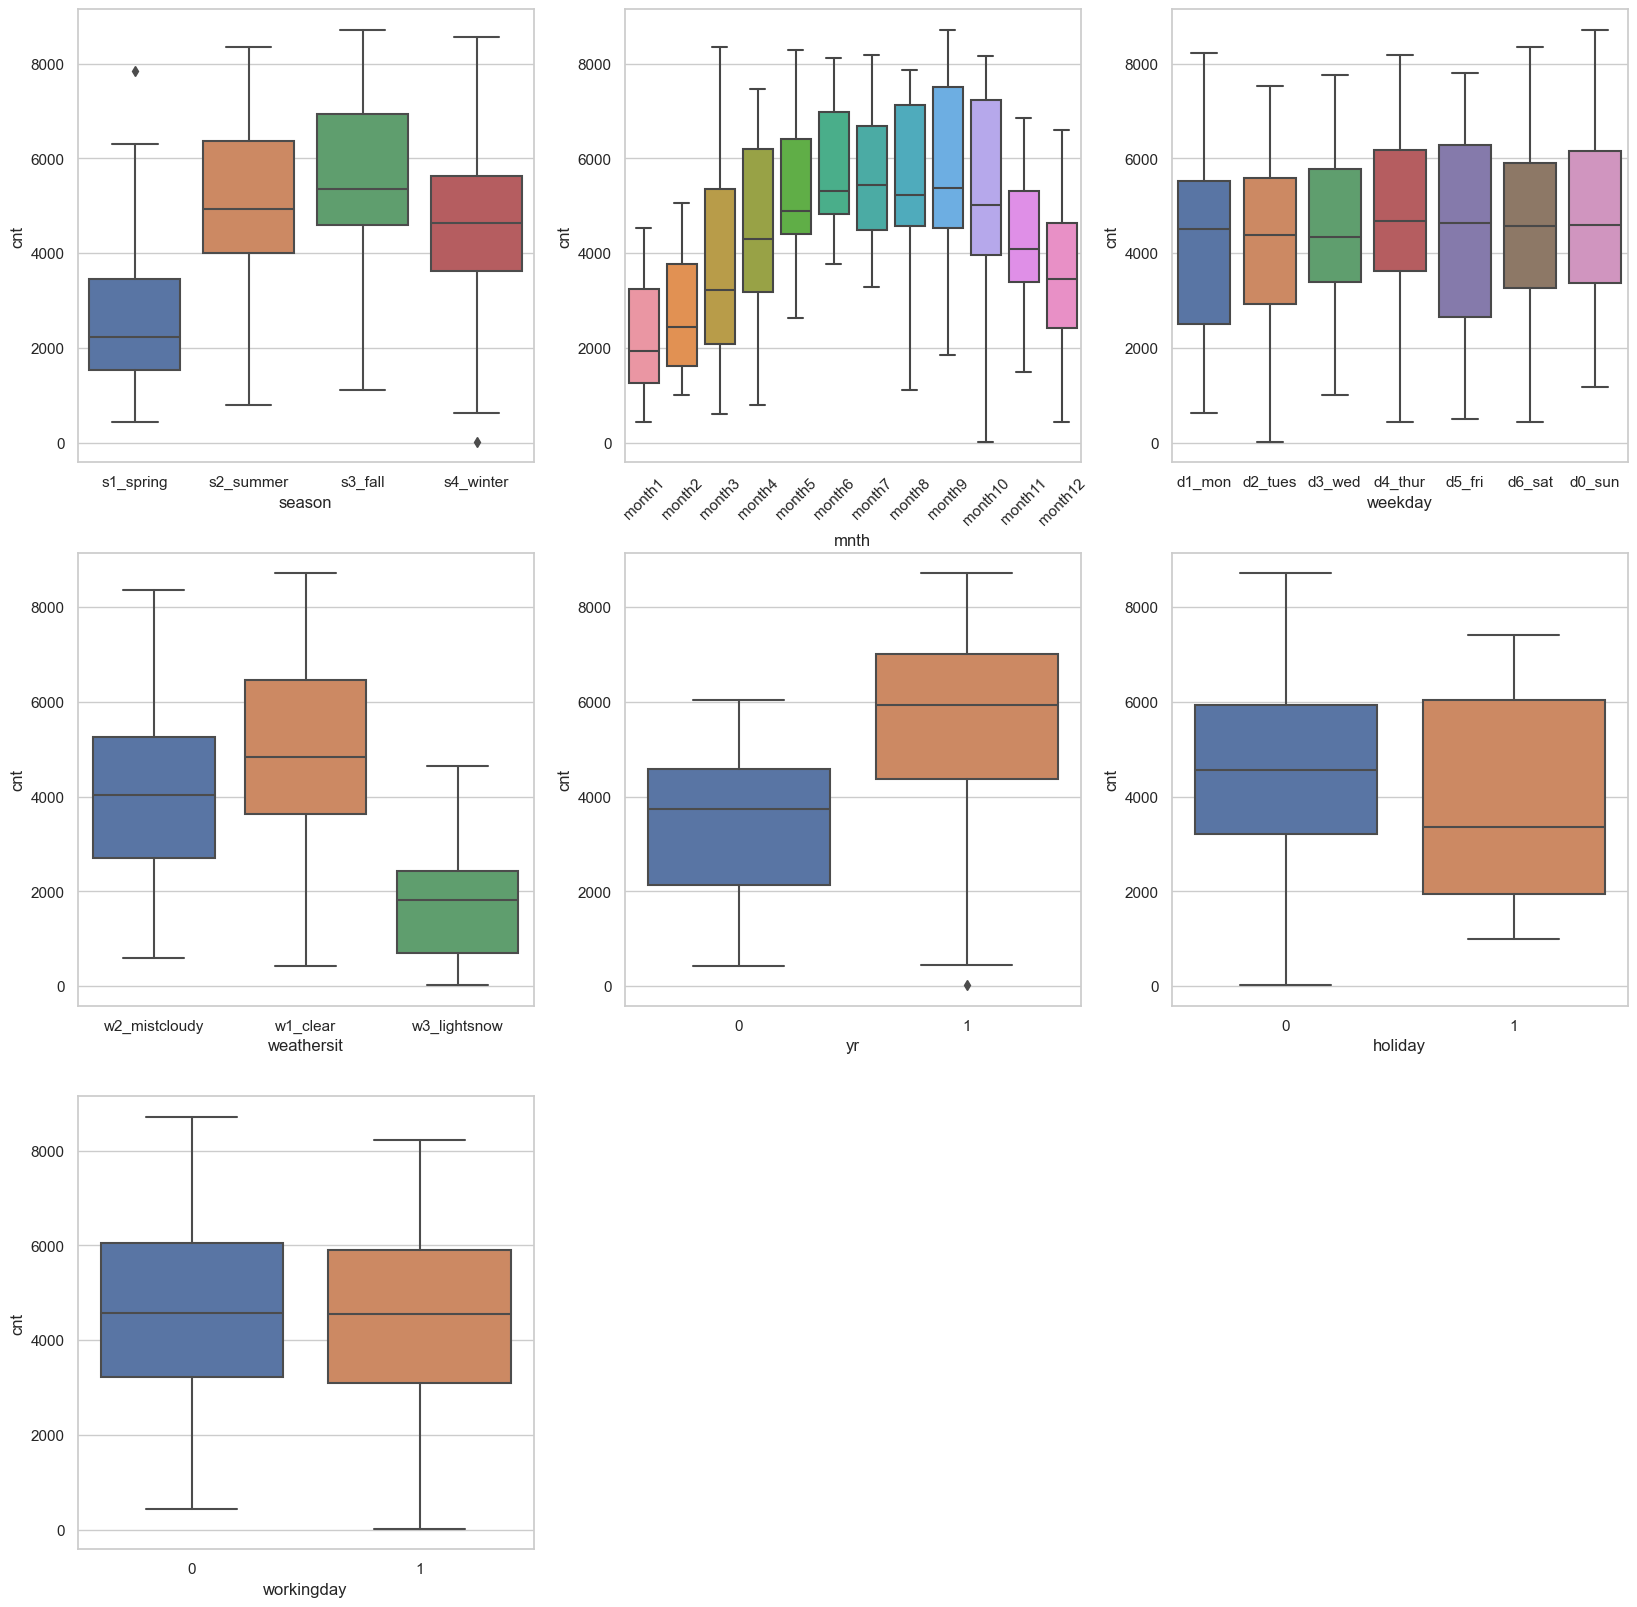

In [23]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x="season",y="cnt",data=df)

plt.subplot(3,3,2)
sns.boxplot(x="mnth",y="cnt",data=df)
plt.xticks(rotation=45)

plt.subplot(3,3,3)
sns.boxplot(x="weekday",y="cnt",data=df)

plt.subplot(3,3,4)
sns.boxplot(x="weathersit",y="cnt",data=df)

plt.subplot(3,3,5)
sns.boxplot(x="yr",y="cnt",data=df)

plt.subplot(3,3,6)
sns.boxplot(x="holiday",y="cnt",data=df)

plt.subplot(3,3,7)
sns.boxplot(x="workingday",y="cnt",data=df)

plt.show()

### OBSERVATIONS 
     1. Here target variable is count (cnt) which is count of total rental bikes including both casual and registered.
     2. People are more likely to take bike on rent in the season of Summer and Fall. 
     3.Bike rental rate is more in month of september and october. 
     4.More bikes were rented on thursday, friday ,saturday and Sunday.
     5.Count of rented bikes increases with clear weather. (Clear, Few clouds, Partly cloudy)
     6.More bikes were rented in 2019.
     7. Rental rates are higher during holidays. 
     8. There is no significant difference during working day or not. 

### MULTIVARIATE ANALYSIS

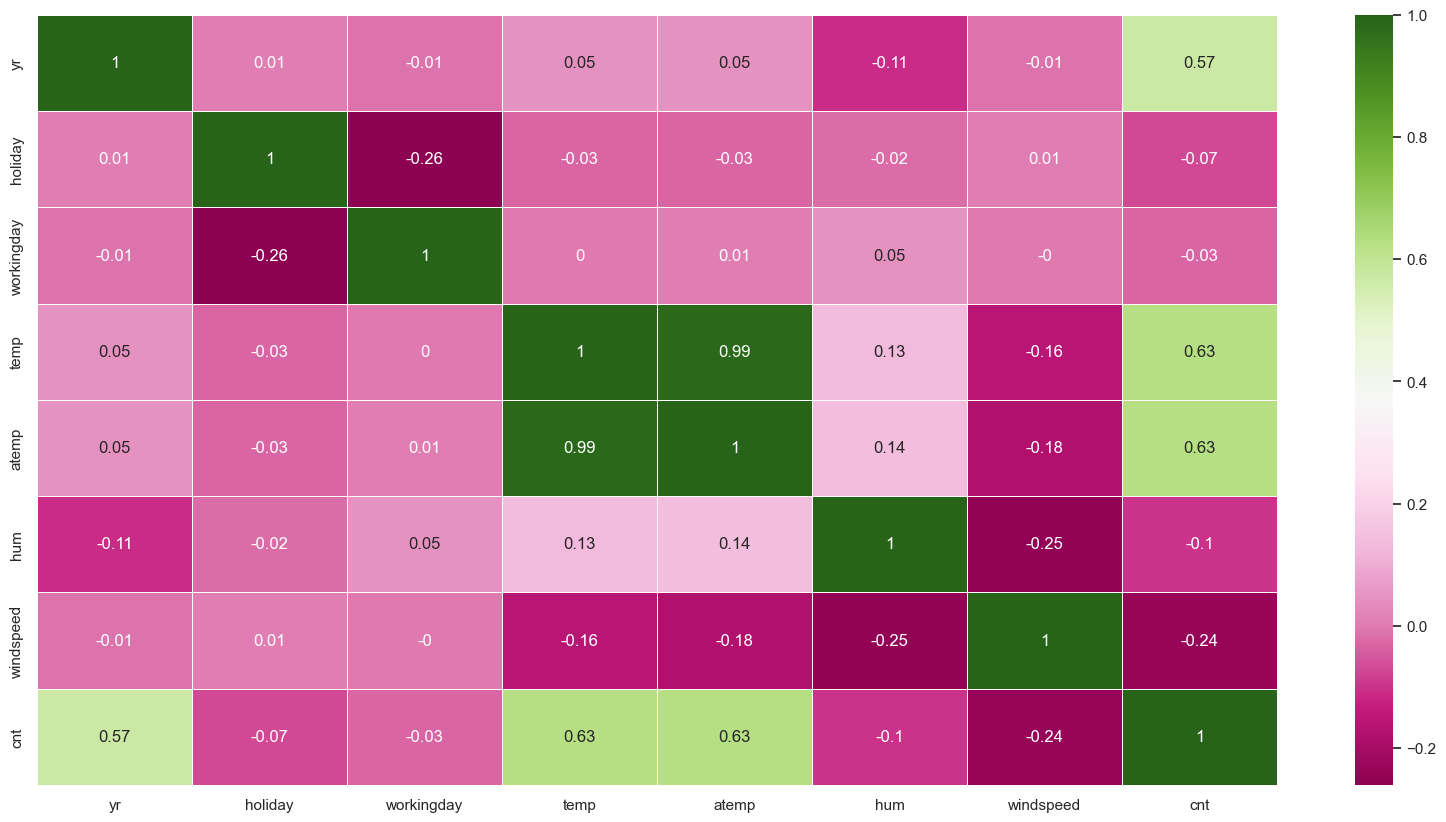

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(round(df.corr(),2),annot=True,cmap="PiYG",linewidths=0.5)
plt.show()

### OBSERVATIONS 
    1. We can see year and count ,temp and count has good correlation.

### STEP 4 - Creating Dummy Variables. 

In [25]:
weekdays=pd.get_dummies(df.weekday,drop_first=True)
months=pd.get_dummies(df.mnth,drop_first=True)
seasons=pd.get_dummies(df.season,drop_first=True)
weather_sit=pd.get_dummies(df.weathersit,drop_first=True)

In [26]:
## Concatinating the dummy variables with main data 
df=pd.concat([df,weekdays,months,seasons,weather_sit],axis=1)

In [27]:
# Dropping 
df=df.drop(["weekday","mnth","season","weathersit"],axis=1)

In [28]:
df.shape

(730, 30)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   atemp          730 non-null    float64
 5   hum            730 non-null    float64
 6   windspeed      730 non-null    float64
 7   cnt            730 non-null    int64  
 8   d1_mon         730 non-null    uint8  
 9   d2_tues        730 non-null    uint8  
 10  d3_wed         730 non-null    uint8  
 11  d4_thur        730 non-null    uint8  
 12  d5_fri         730 non-null    uint8  
 13  d6_sat         730 non-null    uint8  
 14  month10        730 non-null    uint8  
 15  month11        730 non-null    uint8  
 16  month12        730 non-null    uint8  
 17  month2         730 non-null    uint8  
 18  month3    

In [30]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,d1_mon,d2_tues,d3_wed,d4_thur,d5_fri,d6_sat,month10,month11,month12,month2,month3,month4,month5,month6,month7,month8,month9,s2_summer,s3_fall,s4_winter,w2_mistcloudy,w3_lightsnow
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.143836,0.143836,0.142466,0.142466,0.142466,0.142466,0.084932,0.082192,0.084932,0.076712,0.084932,0.082192,0.084932,0.082192,0.084932,0.084932,0.082192,0.252055,0.257534,0.243836,0.336986,0.028767
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.351164,0.351164,0.349767,0.349767,0.349767,0.349767,0.278971,0.274845,0.278971,0.266317,0.278971,0.274845,0.278971,0.274845,0.278971,0.278971,0.274845,0.434490,0.437576,0.429689,0.473004,0.167266
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 5 - Train and Test Split

In [31]:
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

In [32]:
print("training_set_shape= ",df_train.shape)
print("test_set_shape= ",df_test.shape)

training_set_shape=  (510, 30)
test_set_shape=  (219, 30)


## RESCALING -
    There are two ways of rescaling-
        a) Min-Max scaling 
        b) Standardisation 

In [33]:
#Min-Max scaling
scaler=MinMaxScaler()
#creating list of numeric variable
num_vars=["temp","hum","windspeed","cnt","atemp"]
#fit scale on data 
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,d1_mon,d2_tues,d3_wed,d4_thur,d5_fri,d6_sat,month10,month11,month12,month2,month3,month4,month5,month6,month7,month8,month9,s2_summer,s3_fall,s4_winter,w2_mistcloudy,w3_lightsnow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.086275,0.086275,0.084314,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.245098,0.262745,0.24902,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.281045,0.281045,0.278131,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.430568,0.440557,0.43287,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Observations 
    1. All numeric variables are now in range of 0 to 1. 

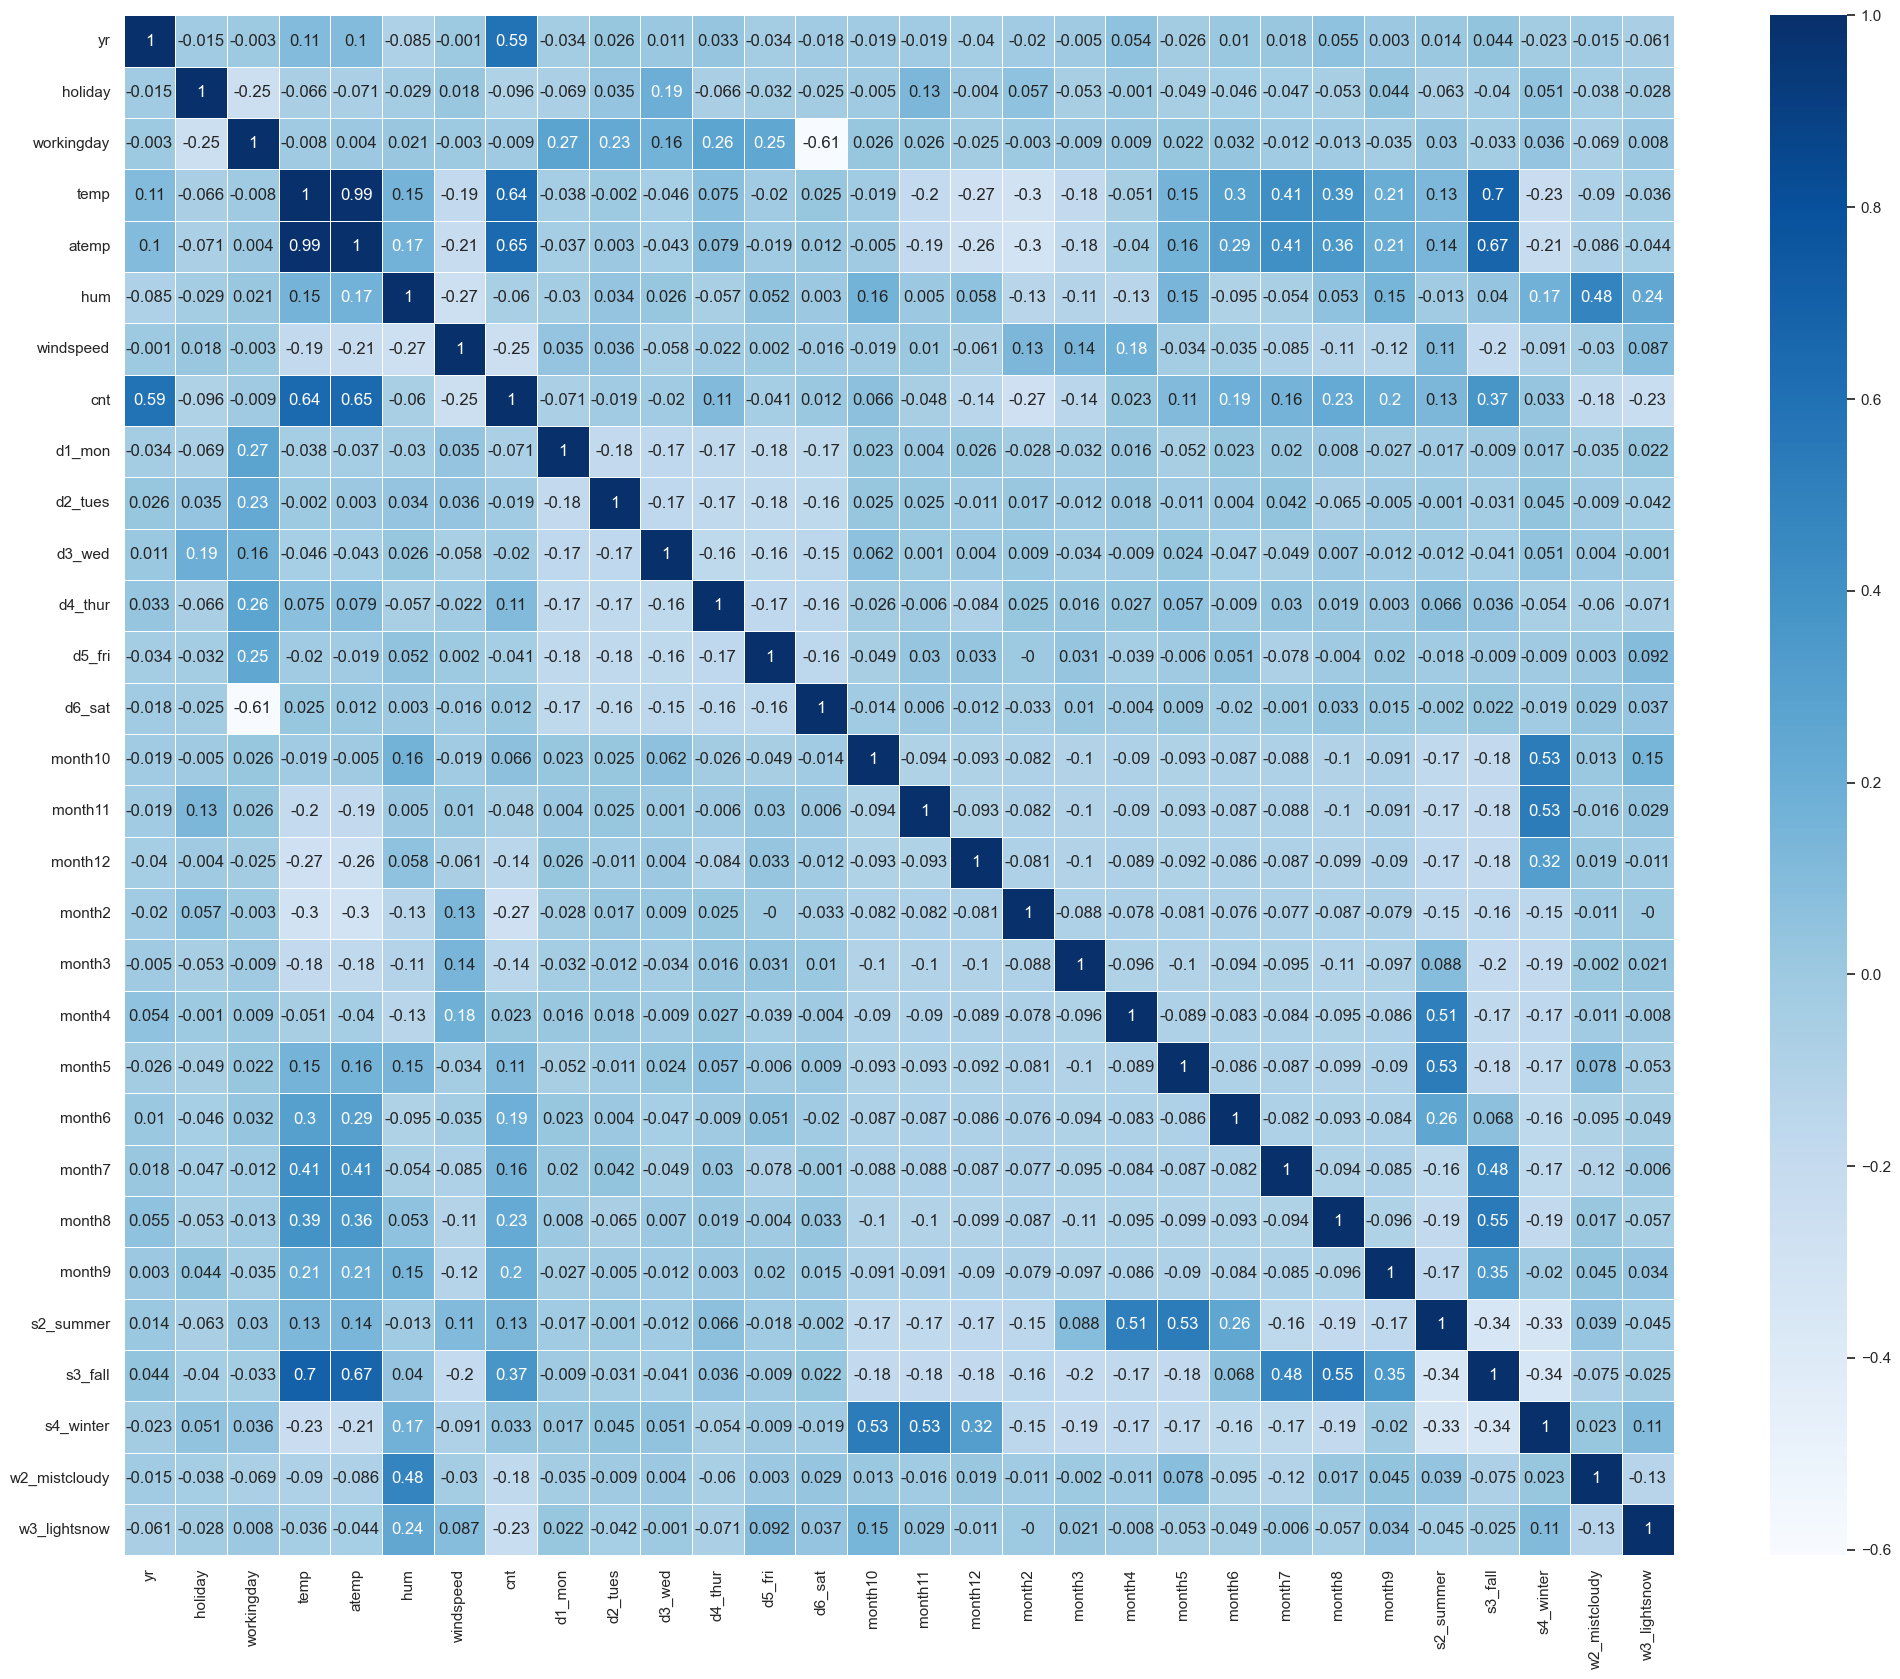

In [35]:
#checking correlations 
plt.figure(figsize=(25,20))
sns.heatmap(round(df_train.corr(),3),annot=True,cmap="Blues",linewidths=0.5)
plt.show()

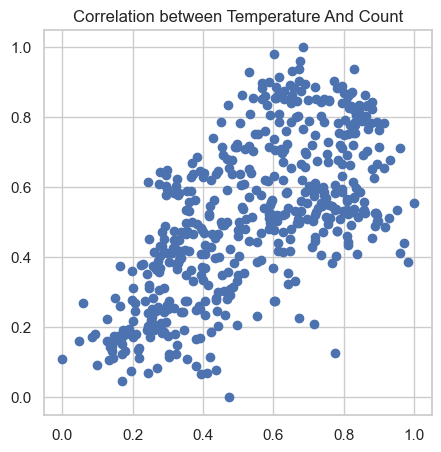

In [36]:
# checking correlations of count with temp
plt.figure(figsize=(5,5))
plt.title("Correlation between Temperature And Count")
plt.scatter(df_train.temp,df_train.cnt)
plt.show()

### Observation 
    There is a good linear relatuionship between temperature and count.

### Training the model

#### Dividing into X and y sets for the model building

In [37]:
y_train=df_train.pop('cnt')
X_train=df_train

In [38]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'd1_mon', 'd2_tues', 'd3_wed', 'd4_thur', 'd5_fri', 'd6_sat', 'month10',
       'month11', 'month12', 'month2', 'month3', 'month4', 'month5', 'month6',
       'month7', 'month8', 'month9', 's2_summer', 's3_fall', 's4_winter',
       'w2_mistcloudy', 'w3_lightsnow'],
      dtype='object')

### Using RFE approach (Recursive Feature Selection)

In [39]:
# using linear regression 
lm=LinearRegression()
#fitting the model 
lm.fit(X_train,y_train)
#selecting top 15 features"
rfe=RFE(lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [40]:
# list of columns with ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('d1_mon', False, 9),
 ('d2_tues', False, 10),
 ('d3_wed', False, 8),
 ('d4_thur', False, 6),
 ('d5_fri', False, 7),
 ('d6_sat', False, 15),
 ('month10', True, 1),
 ('month11', False, 13),
 ('month12', False, 14),
 ('month2', False, 11),
 ('month3', True, 1),
 ('month4', False, 2),
 ('month5', True, 1),
 ('month6', False, 3),
 ('month7', False, 12),
 ('month8', True, 1),
 ('month9', True, 1),
 ('s2_summer', True, 1),
 ('s3_fall', True, 1),
 ('s4_winter', True, 1),
 ('w2_mistcloudy', True, 1),
 ('w3_lightsnow', True, 1)]

In [41]:
# TOP 15 Features 
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'month10', 'month3',
       'month5', 'month8', 'month9', 's2_summer', 's3_fall', 's4_winter',
       'w2_mistcloudy', 'w3_lightsnow'],
      dtype='object')

In [42]:
X_train_rfe=X_train[col]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,month10,month3,month5,month8,month9,s2_summer,s3_fall,s4_winter,w2_mistcloudy,w3_lightsnow
653,1,0,0.509887,0.575354,0.300794,1,0,0,0,0,0,0,1,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,1,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,1,0,0,1,0


In [43]:
#Adding constant
X_train_new1=sm.add_constant(X_train_rfe)
#fitting the model 
lm=sm.OLS(y_train,X_train_new1).fit()
# print model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          2.95e-189
Time:                        18:56:49   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2376      0.027      8.689

In [44]:
lm.params

const            0.237574
yr               0.230385
holiday         -0.089060
temp             0.484667
hum             -0.178353
windspeed       -0.183595
month10          0.043662
month3           0.033322
month5           0.030660
month8           0.051139
month9           0.120896
s2_summer        0.115215
s3_fall          0.043588
s4_winter        0.153434
w2_mistcloudy   -0.055804
w3_lightsnow    -0.244542
dtype: float64

In [45]:
vif=pd.DataFrame()
X=X_train_rfe
vif["features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif


,features,VIF
2,temp,24.64
3,hum,15.55
11,s3_fall,8.80
4,windspeed,3.80
10,s2_summer,3.73
12,s4_winter,3.13
13,w2_mistcloudy,2.15
0,yr,2.04
8,month8,1.85
7,month5,1.68


#### Since p value of month 5 is  0.087 which is more than 0.05 hence we will drop this column. 

In [46]:
## rebuilding model without month5
X_train_rfe=X_train_rfe.drop(["month5"],axis=1)

In [47]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'month10', 'month3',
       'month8', 'month9', 's2_summer', 's3_fall', 's4_winter',
       'w2_mistcloudy', 'w3_lightsnow'],
      dtype='object')

In [48]:
X_train_new2=sm.add_constant(X_train_rfe)
lm1=sm.OLS(y_train,X_train_new2).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          9.02e-190
Time:                        18:56:49   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2321      0.027      8.530

In [49]:
X_train_new2.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'month10',
       'month3', 'month8', 'month9', 's2_summer', 's3_fall', 's4_winter',
       'w2_mistcloudy', 'w3_lightsnow'],
      dtype='object')

In [50]:
#VIF
vif=pd.DataFrame()
X=X_train_rfe
vif["features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
2,temp,24.01
3,hum,15.51
10,s3_fall,8.53
4,windspeed,3.73
9,s2_summer,3.51
11,s4_winter,3.07
12,w2_mistcloudy,2.15
0,yr,2.03
7,month8,1.85
5,month10,1.64


#### Since p value of s3_fall is  0.106 which is more than 0.05 hence we will drop this column.                

In [51]:
X_train_rfe=X_train_rfe.drop(["s3_fall"],axis=1)

In [52]:
X_train_new3=sm.add_constant(X_train_rfe)
lm2=sm.OLS(y_train,X_train_new3).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          2.26e-190
Time:                        18:56:49   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2324      0.027      8.529

In [53]:
#VIF
vif=pd.DataFrame()
X=X_train_rfe
vif["features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif


,features,VIF
3,hum,14.75
2,temp,10.01
4,windspeed,3.69
10,s4_winter,2.34
11,w2_mistcloudy,2.14
0,yr,2.02
9,s2_summer,1.83
5,month10,1.61
7,month8,1.61
8,month9,1.34


#### Since p value of month 3 is 0.093   which is more than 0.05 hence dropping it.

In [54]:
X_train_rfe=X_train_rfe.drop(["month3"],axis=1)

In [55]:
X_train_new4=sm.add_constant(X_train_rfe)
lm3=sm.OLS(y_train,X_train_new4).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          6.02e-191
Time:                        18:56:49   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2390      0.027      8.848

In [56]:
#VIF
vif=pd.DataFrame()
X=X_train_rfe
vif["features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
3,hum,14.41
2,temp,9.88
4,windspeed,3.59
9,s4_winter,2.27
10,w2_mistcloudy,2.13
0,yr,2.02
8,s2_summer,1.83
5,month10,1.61
6,month8,1.60
7,month9,1.34


#### Since VIF value of hum is 14.41 which means it is highly correlated and it is more than 5 therefore dropping it.

In [57]:
X_train_rfe=X_train_rfe.drop(["hum"],axis=1)
X_train_new5=sm.add_constant(X_train_rfe)
lm4=sm.OLS(y_train,X_train_new5).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          3.21e-187
Time:                        18:56:49   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1355      0.017      8.079

In [58]:
vif=pd.DataFrame()
X=X_train_rfe
vif["features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
8,s4_winter,1.95
7,s2_summer,1.82
4,month10,1.60
5,month8,1.59
9,w2_mistcloudy,1.49
6,month9,1.34
10,w3_lightsnow,1.09


### Since p value of month 10 is  0.054  which is more than 0.05 , hence dropping it.

In [59]:
X_train_rfe=X_train_rfe.drop(["month10"],axis=1)
X_train_new6=sm.add_constant(X_train_rfe)
lm5=sm.OLS(y_train,X_train_new6).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          1.26e-187
Time:                        18:56:49   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1312      0.017      7.871

In [60]:
#VIF
vif=pd.DataFrame()
X=X_train_rfe
vif["features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
6,s2_summer,1.81
4,month8,1.58
7,s4_winter,1.49
8,w2_mistcloudy,1.48
5,month9,1.31
9,w3_lightsnow,1.08
1,holiday,1.04


In [61]:
X_train_rfe.head()

,yr,holiday,temp,windspeed,month8,month9,s2_summer,s4_winter,w2_mistcloudy,w3_lightsnow
653,1,0,0.509887,0.300794,0,0,0,1,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1,0,0.395666,0.188475,0,0,1,0,1,0


In [62]:
X_train_new6.head()

,const,yr,holiday,temp,windspeed,month8,month9,s2_summer,s4_winter,w2_mistcloudy,w3_lightsnow
653,1.0,1,0,0.509887,0.300794,0,0,0,1,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0


## Residual Analysis of the train data

In [63]:
y_train_cnt=lm5.predict(X_train_new6)

Text(0.5, 0, 'Errors')

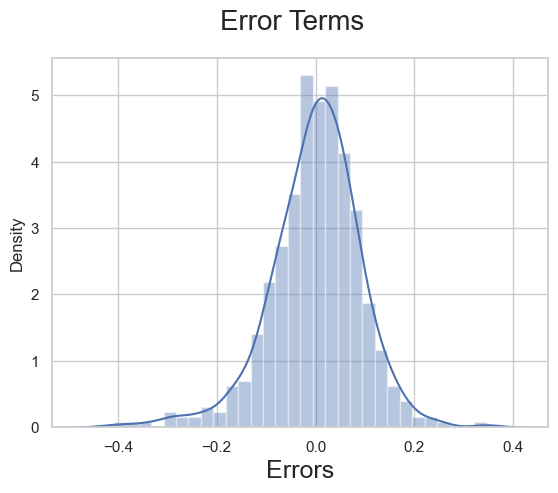

In [64]:
# Plot histogram 
fig = plt.figure()
sns.distplot((y_train - y_train_cnt),bins=30)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [65]:
import statsmodels.api as sm
residuals = lm.resid
dw_test = sm.stats.stattools.durbin_watson(residuals)
# conclusion
print(f"durbin-watson test statistics:{dw_test}")
if dw_test < 1.5:
    print("autocorrelation may be positive.")
elif dw_test > 2.5:
    print("autocorrelation may be negative.")
else:
    print("No significant autocorrelation detected.")


durbin-watson test statistics:2.0257753214855647
No significant autocorrelation detected.


### Observation - 
    Test for presence of autocorrelation in residual (errors) of a regression model.
        For this durbin_watson(dw) test has been performed. Autocorrelation occurs 
        when there is a pattern or correlation between the error terms. 
        1.	In this test if DW value is close to 2 it indicates errors are independent of
            each other.
        2.	If DW value is significantly  less than 2 (around 1.5) it signifies positive 
            correlation between errors. 
        3.	If DW value is significantly  more than 2 (around 2.5) it signifies 
            negative correlation between errors.
            Here we can see the value is coming out to be 2.025 which shows
            no correlation in error terms. 



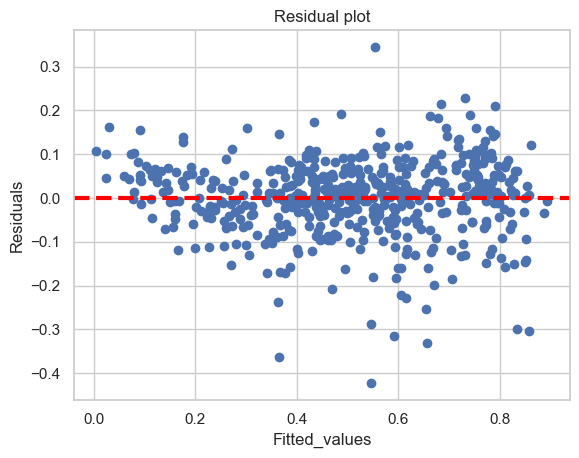

In [66]:
residuals = lm.resid
fitted_values = lm.fittedvalues
plt.scatter(fitted_values , residuals)
plt.axhline(0,color = "red" ,linestyle = "--" , linewidth =3)
plt.xlabel("Fitted_values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()


### Observations 
    We can clearly see there is no pattern which shows  variance is constant for error terms and since there 
    is no pattern so error terms are also independent. 

## Making predictions using final model 

In [67]:
#Applying the scaling on the test sets 
num_vars=["temp","hum","windspeed","cnt","atemp"]
df_test[num_vars]=scaler.transform(df_test[num_vars])

### Dividing it into two data set

In [68]:
y_test=df_test.pop("cnt")
X_test=df_test

In [69]:
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,d1_mon,d2_tues,d3_wed,d4_thur,d5_fri,d6_sat,month10,month11,month12,month2,month3,month4,month5,month6,month7,month8,month9,s2_summer,s3_fall,s4_winter,w2_mistcloudy,w3_lightsnow
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
299,1.0,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
152,1.0,0,0,0,0.817246,0.741471,0.314298,0.537414,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [70]:
X_test_sm=X_test_sm.drop(['workingday', 'hum', 'd1_mon',
       'd2_tues', 'd3_wed', 'd4_thur', 'd5_fri', 'd6_sat', 'month10', 'month11', 'month12',
       'month2', 'month3', 'month4', 'month5', 'month6', 'month7',
        's3_fall',"atemp"], axis=1)

In [71]:
X_test_sm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'month8', 'month9',
       's2_summer', 's4_winter', 'w2_mistcloudy', 'w3_lightsnow'],
      dtype='object')

In [72]:
y_test_pred=lm5.predict(X_test_sm)

In [73]:
r2=r2_score(y_true=y_test,y_pred=y_test_pred)

In [74]:
print("r2 = ",r2)

r2 =  0.7931434526028905


In [75]:
# actual and predicted values
y_true = y_test
y_pred = y_test_pred

# calculating r-squared value 
r_squared = r2_score(y_true , y_pred)

#number of predictor variable(p)
#number of samples (n)

n=len(y_true)
p=10

# Calculating adjusted R-squared 
adjusted_r_squared = 1-((1-r_squared) * (n-1) / (n-p-1))

print("Regular R-squared" , r_squared)
print("Adjusted R-squared" ,adjusted_r_squared)



Regular R-squared 0.7931434526028905
Adjusted R-squared 0.7831984262857219


## Model Evaluation 

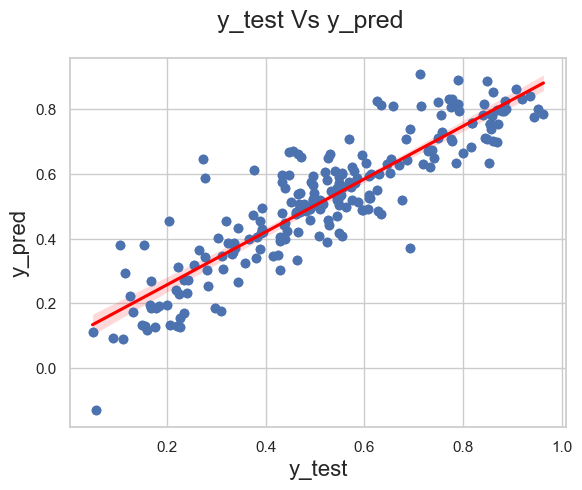

In [76]:
fig=plt.figure()
sns.regplot(x=y_test , y=y_pred ,fit_reg = True , line_kws={"color":"red"})
plt.scatter(y_test ,y_test_pred)
fig.suptitle("y_test Vs y_pred" , fontsize=18)
plt.xlabel("y_test",fontsize = 16)         
plt.ylabel("y_pred" ,fontsize=16)      
plt.show()



### Equation of best fit line is - 
    cnt = 0.2325*yr -0.0971*holiday +  0.5174*temp  -0.1497*windspeed + 0.0542*month8 + 
          0.1162*month9 +  0.1000*s2_summer +  0.1383*s4_winter -0.0825*w2_cloudy
          -0.2828*w3_lightsnow + 0.1312

### MEAN SQUARED ERROR 

In [77]:
mse_train = (mean_squared_error(y_true = y_train ,y_pred = y_train_cnt))
mse_test = (mean_squared_error(y_true = y_test ,y_pred = y_test_pred))
print("Mean squared error of the train set = ", mse_train)
print("Mean squared error of the test set = ",mse_test)


Mean squared error of the train set =  0.008339247332323448
Mean squared error of the test set =  0.009824818889803109


## SUMMARY 
##### Analysis is carried out using mixed feature selection approach. 15 features were selected by using RFE (Recursive Feature Selection) and then removing another features by using statistical approach (p-value and VIF value) & multicollinearity. By applying all these methods top 10 features were selected which are as follows - 
##### ['yr', 'holiday', 'temp', 'windspeed', 'month8', 'month9','s2_summer', 's4_winter', 'w2_cloudy', 'w3_lightsnow']

    1. The R-squared value of the train set is 0.834 i.e., 83.4 % and that of test 
       set is 79.31 % since the difference is less than 5 % which suggests that our model
       broadly explains the variance quite accurately on the test set 
       and thus we conclude its a good model. 
    2. The Adj. R-squared for train set is 0.831 ie 83.1 % and that for test is 
        0.78319 ie 78.31 % which means model is good.
    3. Since mean squared error is almost zero so this implies our model accurately 
       predicts the variance between both test and train set. 
    4. We concluded that the demand of rental bike depends higly on temperature.
    5. Demand is more in the month of august and september and gets reduced during holiday. 
    6. More rental bikes are taken in season summer and winter.
    7. As the demand of bike rent has significantly increased in 2019 than 2018 so
       they are already doing good business.
    8.Holiday , windspeed & heavy rain is affecting business negatively. 
    9. All the positive coeficient in best fit line equation will increase the the value of cnt.

#### Now the company will able to understand how demand varies with different feauture and accordingly they can build a stratergy for business development.